# MSc Thesis - Hugo Stam

#### Investment Strategy Simulation - Adaptive terminal planning in the light of an uncertain future

* [**0. Prepare inputs:**](#0.-Prepare-inputs)<br>
   * [**0.1 Generate demand forecast scenario:**](#0.1-Generate-demand-forecast-scenario)<br>
   * [**0.2 Generate vessels:**](#0.2-Generate-vessels)<br>
* [**1. Instatiate system components:**](#1.-Instatiate-system-components)<br>
* [**2. Start simulation:**](#2.-Strart-simulation)<br>
* [**3. Report all elements:**](#3.-Report-all-elements)<br>

In [1]:
import numpy as np
import pandas as pd
import statistics as st

import matplotlib.pyplot as plt
import matplotlib as mpl

from terminal_optimization import container_objects
from terminal_optimization import container_defaults
from terminal_optimization import container_system

# 0. Prepare inputs

In [2]:
startyear = 2020
lifecycle = 15

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year <= 2025:
        demand.append(1_000_000)
    elif year <= 2030:
        demand.append(1_500_000)
    else:
        demand.append(2_000_000)

scenario_data={'year': years, 'volume': demand}

# ladens
container_defaults.container_data['historic_data'] = []
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)

# combine
demand = [container]

# plot scenarios 
if False:
    laden.plot_demand()

## 0.2 Generate vessels

In [4]:
# instantiate vessels
fully_cellular = container_objects.Vessel(**container_defaults.fully_cellular_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)
panamax_max = container_objects.Vessel(**container_defaults.panamax_max_data)
post_panamax_I = container_objects.Vessel(**container_defaults.post_panamax_I_data)
post_panamax_II = container_objects.Vessel(**container_defaults.post_panamax_II_data)
new_panamax = container_objects.Vessel(**container_defaults.new_panamax_data)
VLCS = container_objects.Vessel(**container_defaults.VLCS_data)
ULCS = container_objects.Vessel(**container_defaults.ULCS_data)

vessels = [fully_cellular, panamax, panamax_max, post_panamax_I, post_panamax_II, new_panamax, VLCS, ULCS] 

# 1. Instatiate system components

## 1.1 Terminal system

In [5]:
Terminal = container_system.System(startyear = startyear, 
                        lifecycle = lifecycle, 
                        elements = demand + vessels, 
                        operational_hours = 7500,
                        debug=True)

# 2. Start simulation

This method automatically generates investment decisions, parametrically derived from overall demand trends and a number of investment triggers.

Apply frame of reference style decisions while stepping through each year of the terminal lifecycle and check if investment is needed (in light of strategic objective, operational objective, QSC, decision recipe, intervention method):
    1. for each year evaluate the demand of each commodity (see 0.1 Demand forecast scenario)
    2. for each year evaluate the various investment decisions
    3. for each year calculate the energy costs (requires insight in realized demands)
    4. for each year calculate the demurrage costs (requires insight in realized demands)
    5. for each year calculate terminal revenues
    6. collect all cash flows (capex, opex, revenues)
    7. calculate PV's and aggregate to NPV

In [6]:
Terminal.simulate()

Below, the various investment decisions are evaluated for the year 2020
Simulate year: 2020
  Total vessel calls: 295
  Fully cellular calls: 0
  Panamax calls: 295
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 0
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 1000000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
     Crane occupancy planned (@ start of year): inf
     Crane occupancy online (@ start of year): inf
     waiting time factor (@ start of year): inf
     waiting time occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding berth): inf
     Berth occupancy online (after adding berth): inf
  *** add Quay to elements
     Berth occupancy planned (after adding

  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
     Stack capacity planned (@ start of year): 14080
     Stack capacity online (@ start of year): 14080
     Stack capacity required (@ start of year): 13905.76923076923
     Total laden and reefer ground slots required (@ start of year): 3476.4423076923076
     Empty stack capacity planned (@ start of year): 2400
     Empty stack capacity online (@ start of year): 2400
     Empty stack capacity required (@ start of year): 1923.0769230769229
     Empty ground slots required (@ start of year): 320.5128205128205
     OOG slots planned (@ start of year): 500
     OOG slots online (@ start of year): 500
     OOG slots required (@ start of year): 482.4924179762889
     Number of stack equipment online (@ start of year): 0
  

     Berth occupancy planned (after adding crane): 0.7168898472596587
     Berth occupancy online (after adding crane): 0.806904821802935
  *** add STS crane to elements
     Berth occupancy planned (after adding crane): 0.6493786163522012
     Berth occupancy online (after adding crane): 0.806904821802935
  *** add Berth to elements
     Berth occupancy planned (after adding berth): 0.5904452830188679
     Berth occupancy online (after adding berth): 0.7479714884696017
  *** add Quay to elements
     Berth occupancy planned (after adding quay): 0.5904452830188679
     Berth occupancy online (after adding quay): 0.7479714884696017
  *** add STS crane to elements
     Berth occupancy planned (after adding crane): 0.5379365478686233
     Berth occupancy online (after adding crane): 0.7479714884696017
     Horizontal transport online (@ start of year): 30
     Number of STS cranes (@start of year): 6
     Stack capacity planned (@ start of year): 14080
     Stack capacity online (@ start 

  Total vessel calls: 442
  Fully cellular calls: 0
  Panamax calls: 442
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 0
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 1500000
     a total of 3 Berth_01 is online; 3 total planned
     a total of 3 Quay_01 is online; 3 total planned
     a total of 9 STS_crane is online; 9 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): 0.5379365478686233
     Berth occupancy online (@ start of year): 0.5379365478686233
     Crane occupancy planned (@ start of year): 0.4200698812019567
     Crane occupancy online (@ start of year): 0.4200698812019567
     waiting time factor (@ start of year): 0.067815717590683
     waiting time occupancy (@ start of year): 0.028487340431943654
     Horizontal transport online (@ start of year): 45
     Number of STS cranes (@start of year): 9
     Stack capacity planned (@ start of year): 21120
     Stack capacity online (@ start

  *** add stack equipment to elements
  *** add stack equipment to elements
     Gate capacity planned (@ start of year): 480
     Gate capacity online (@ start of year): 480
     Service rate planned (@ start of year): 0.9014888337468981
     Gate lane minutes  (@ start of year): 432.7146401985111
     Empty handlers online (@ start of year): 60
Below, the various investment decisions are evaluated for the year 2033
Simulate year: 2033
  Total vessel calls: 589
  Fully cellular calls: 0
  Panamax calls: 589
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 0
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 2000000
     a total of 3 Berth_01 is online; 3 total planned
     a total of 3 Quay_01 is online; 3 total planned
     a total of 12 STS_crane is online; 12 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): 0.5768989517819706
     Berth occupancy online (@ start of year): 0.5768989517819706
     Cran

(array([-5.14838604e+07, -2.01182780e+08, -3.08917681e+07, -2.72009699e+07,
        -2.39511302e+07, -2.10895656e+07, -6.58234947e+07, -3.56472452e+07,
        -2.14445829e+07, -1.88824884e+07, -1.66265005e+07, -3.59982745e+07,
        -1.69044582e+07, -1.48847958e+07, -1.31064327e+07]),
 {'equipment': 'rs',
  'cost_land': 0,
  'cost_fuel': 1,
  'cost_power': 0.17,
  'land': 594705.0500000006,
  'labour': 43170000.0,
  'opex': 77821891.47445531,
  'capex': 490159347.0,
  'PV': array([-5.14838604e+07, -2.01182780e+08, -3.08917681e+07, -2.72009699e+07,
         -2.39511302e+07, -2.10895656e+07, -6.58234947e+07, -3.56472452e+07,
         -2.14445829e+07, -1.88824884e+07, -1.66265005e+07, -3.59982745e+07,
         -1.69044582e+07, -1.48847958e+07, -1.31064327e+07])})

## 3. Report all elements

In [7]:
if True: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)


Laden

{'historic_data': [], 'scenario_data':     year   volume
0   2020  1000000
1   2021  1000000
2   2022  1000000
3   2023  1000000
4   2024  1000000
5   2025  1000000
6   2026  1500000
7   2027  1500000
8   2028  1500000
9   2029  1500000
10  2030  1500000
11  2031  2000000
12  2032  2000000
13  2033  2000000
14  2034  2000000, 'handling_fee': 150, 'fully_cellular_perc': 0, 'panamax_perc': 100, 'panamax_max_perc': 0, 'post_panamax_I_perc': 0, 'post_panamax_II_perc': 0, 'new_panamax_perc': 0, 'VLCS_perc': 0, 'ULCS_perc': 0, 'name': 'Laden', 'id': 'd1ad9b8a-a9fa-11e9-93b9-0050b697a632'}

Fully_Cellular_1

{'type': 'Fully_Cellular', 'call_size': 2500, 'LOA': 215, 'draft': 10.0, 'beam': 20.0, 'max_cranes': 4, 'all_turn_time': 31, 'mooring_time': 6, 'demurrage_rate': 730, 'transport_costs': 200, 'name': 'Fully_Cellular_1', 'id': 'd1af0094-a9fa-11e9-b078-0050b697a632'}

Panamax_1

{'type': 'Panamax', 'call_size': 3400, 'LOA': 250, 'draft': 12.5, 'beam': 32.2, 'max_cranes': 4, 'all_turn

{'triggers': [], 'labour': 125000, 'maintenance': 8500.0, 'energy': [], 'insurance': [], 'lease': [], 'demurrage': [], 'residual': [], 'fuel': [], 'capex': 86000, 'type': 'tractor_trailer', 'ownership': 'Terminal operator', 'delivery_time': 0, 'lifespan': 10, 'unit_rate': 85000, 'mobilisation': 1000, 'maintenance_perc': 0.1, 'insurance_perc': 0.01, 'crew': 1, 'salary': 30000, 'utilisation': 0.8, 'fuel_consumption': 2, 'productivity': 1, 'required': 5, 'non_essential_moves': 1.2, 'year_purchase': [], 'year_online': 2022, 'name': 'Tractor-trailer', 'id': 'd20608c0-a9fa-11e9-9178-0050b697a632', 'shift': 5, 'df':     year    capex  maintenance    labour          fuel
0   2020      0.0          0.0       0.0      0.000000
1   2021  86000.0          0.0       0.0      0.000000
2   2022      0.0       8500.0  125000.0  51023.041475
3   2023      0.0       8500.0  125000.0  51023.041475
4   2024      0.0       8500.0  125000.0  51023.041475
5   2025      0.0       8500.0  125000.0  51023.04147

Empty Handler

{'triggers': [], 'labour': 125000, 'maintenance': 10000.0, 'energy': [], 'insurance': [], 'lease': [], 'demurrage': [], 'residual': [], 'fuel': [], 'capex': 505000, 'type': 'empty_handler', 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 15, 'unit_rate': 500000, 'mobilisation': 5000, 'maintenance_perc': 0.02, 'crew': 1, 'salary': 35000, 'fuel_consumption': 1.5, 'required': 5, 'year_purchase': [], 'year_online': 2032, 'name': 'Empty Handler', 'id': 'd2866033-a9fa-11e9-952b-0050b697a632', 'shift': 5, 'df':     year     capex  maintenance    labour         fuel
0   2020       0.0          0.0       0.0     0.000000
1   2021       0.0          0.0       0.0     0.000000
2   2022       0.0          0.0       0.0     0.000000
3   2023       0.0          0.0       0.0     0.000000
4   2024       0.0          0.0       0.0     0.000000
5   2025       0.0          0.0       0.0     0.000000
6   2026       0.0          0.0       0.0     0.000000
7   2027       0.

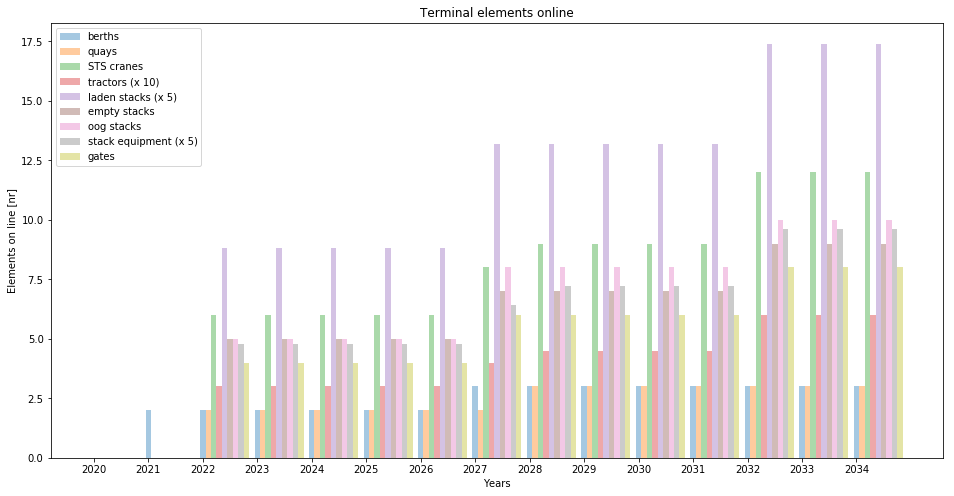

In [8]:
Terminal.terminal_elements_plot()

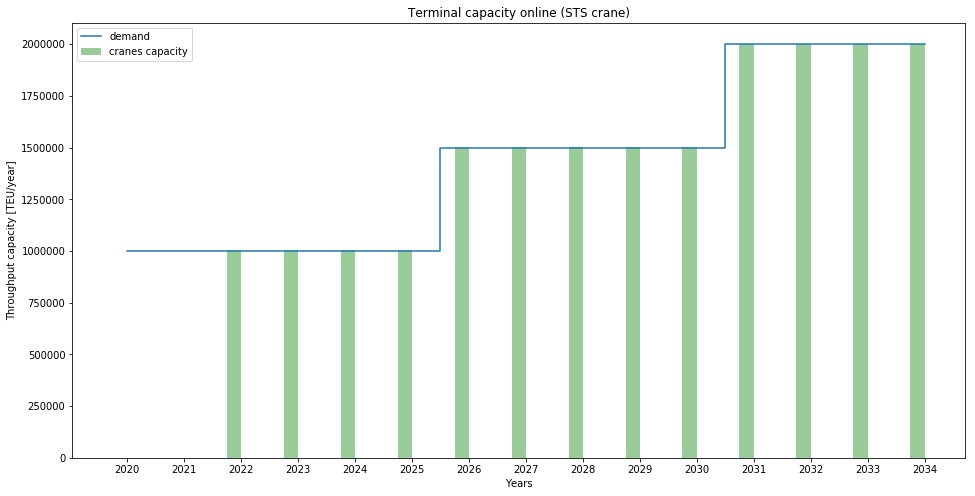

In [9]:
Terminal.terminal_capacity_plot()

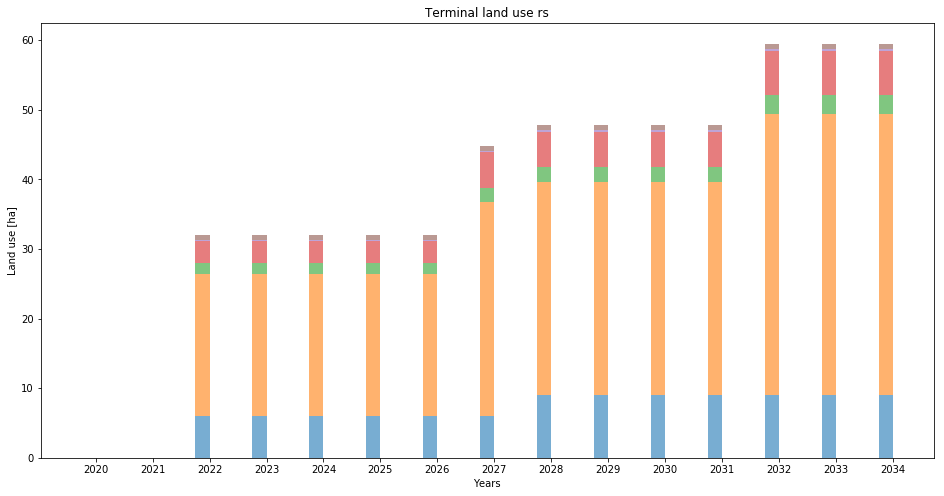

In [10]:
Terminal.land_use_plot()

#### Add cash flow information for each of the terminal elements.

In [11]:
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

    year        capex   maintenance    insurance        energy      labour  \
0   2020   51483860.4  0.000000e+00        0.000  0.000000e+00         NaN   
1   2021  228480521.6  0.000000e+00        0.000  0.000000e+00         NaN   
2   2022          0.0  9.674017e+06  1333312.470  4.532241e+06  21585000.0   
3   2023          0.0  9.674017e+06  1333312.470  4.532241e+06  21585000.0   
4   2024          0.0  9.674017e+06  1333312.470  4.532241e+06  21585000.0   
5   2025          0.0  9.674017e+06  1333312.470  4.532241e+06  21585000.0   
6   2026   96946704.2  9.674017e+06  1333312.470  6.133670e+06  23065000.0   
7   2027   31111286.8  1.391926e+07  1533312.470  6.155426e+06  30065000.0   
8   2028          0.0  1.472841e+07  1999968.705  6.160509e+06  32377500.0   
9   2029          0.0  1.472841e+07  1999968.705  6.160509e+06  32377500.0   
10  2030          0.0  1.472841e+07  1999968.705  6.160509e+06  32377500.0   
11  2031   82136974.0  1.472841e+07  1999968.705  7.761939e+06  

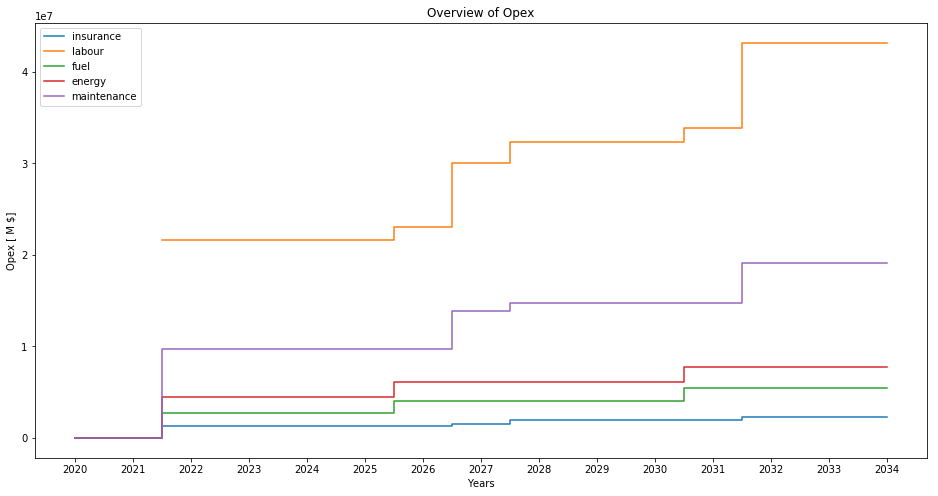

In [12]:
# Terminal.capex_plot(cash_flows)
Terminal.opex_plot(cash_flows)

PV: [-5.14838604e+07 -2.01182780e+08 -3.08917681e+07 -2.72009699e+07
 -2.39511302e+07 -2.10895656e+07 -6.58234947e+07 -3.56472452e+07
 -2.14445829e+07 -1.88824884e+07 -1.66265005e+07 -3.59982745e+07
 -1.69044582e+07 -1.48847958e+07 -1.31064327e+07]
NPV: -595118346.8591002
[-5.14838604e+07 -2.01182780e+08 -3.08917681e+07 -2.72009699e+07
 -2.39511302e+07 -2.10895656e+07 -6.58234947e+07 -3.56472452e+07
 -2.14445829e+07 -1.88824884e+07 -1.66265005e+07 -3.59982745e+07
 -1.69044582e+07 -1.48847958e+07 -1.31064327e+07]
PV: [-5.14838604e+07 -2.01182780e+08 -3.08917681e+07 -2.72009699e+07
 -2.39511302e+07 -2.10895656e+07 -6.58234947e+07 -3.56472452e+07
 -2.14445829e+07 -1.88824884e+07 -1.66265005e+07 -3.59982745e+07
 -1.69044582e+07 -1.48847958e+07 -1.31064327e+07]
NPV: -595118346.8591002
[-5.14838604e+07 -2.01182780e+08 -3.08917681e+07 -2.72009699e+07
 -2.39511302e+07 -2.10895656e+07 -6.58234947e+07 -3.56472452e+07
 -2.14445829e+07 -1.88824884e+07 -1.66265005e+07 -3.59982745e+07
 -1.69044582e+

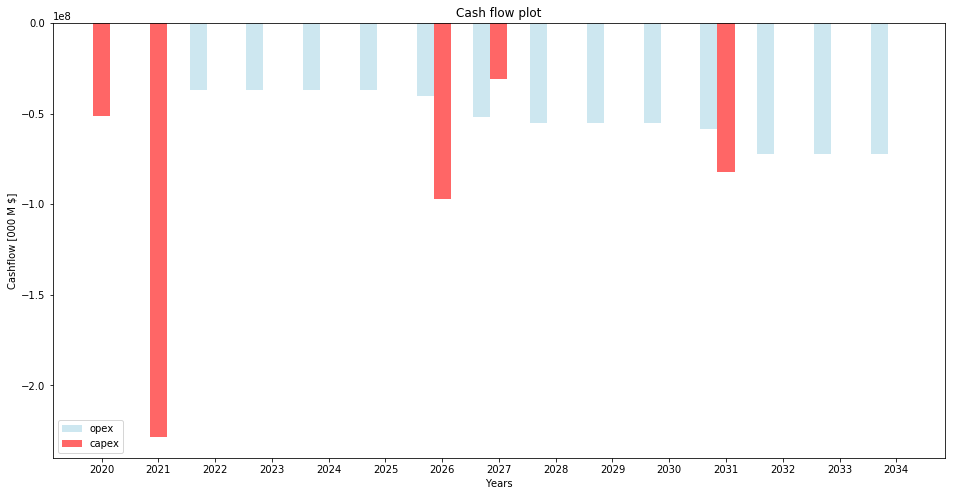

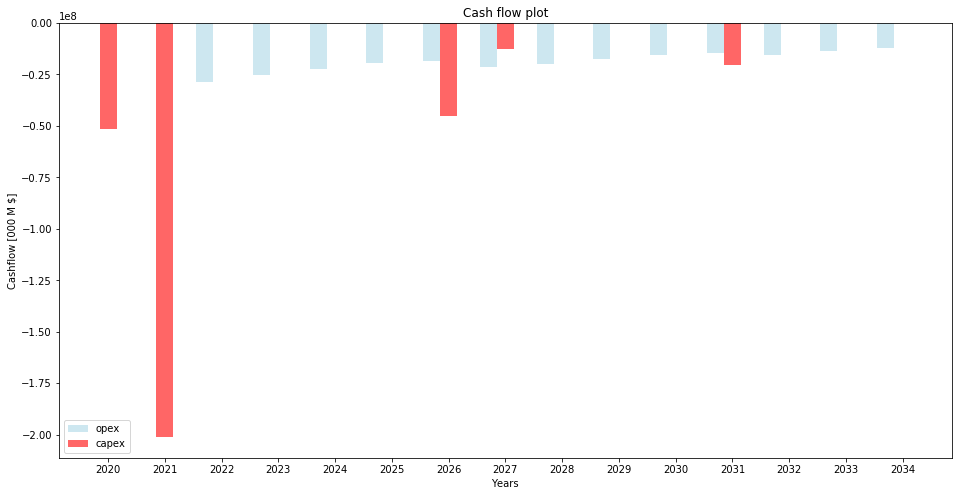

In [13]:
Terminal.cashflow_plot(cash_flows)
Terminal.cashflow_plot(cash_flows_WACC_real)

In [14]:
Terminal.NPV()

PV: [-5.14838604e+07 -2.01182780e+08 -3.08917681e+07 -2.72009699e+07
 -2.39511302e+07 -2.10895656e+07 -6.58234947e+07 -3.56472452e+07
 -2.14445829e+07 -1.88824884e+07 -1.66265005e+07 -3.59982745e+07
 -1.69044582e+07 -1.48847958e+07 -1.31064327e+07]
NPV: -595118346.8591002


(array([-5.14838604e+07, -2.01182780e+08, -3.08917681e+07, -2.72009699e+07,
        -2.39511302e+07, -2.10895656e+07, -6.58234947e+07, -3.56472452e+07,
        -2.14445829e+07, -1.88824884e+07, -1.66265005e+07, -3.59982745e+07,
        -1.69044582e+07, -1.48847958e+07, -1.31064327e+07]),
 array([5.14838604e+07, 2.28480522e+08, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.69467042e+07, 3.11112868e+07,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.21369740e+07,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([              nan,               nan, 39843687.08397767,
        39843687.08397767, 39843687.08397767, 39843687.08397767,
        44284674.3854665 , 55751670.8324665 , 59345066.42996649,
        59345066.42996649, 59345066.42996649, 63786053.73145534,
        77821891.47445531, 77821891.47445531, 77821891.47445531]),
 array([      nan,       nan, 21585000., 21585000., 21585000., 21585000.,
        23065000., 30065000., 323775